<a href="https://colab.research.google.com/github/ElenaTratsevskaya/DA-Proect_AB-test/blob/main/DA_Proect_A_B_test_On_demand(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div id="header" align="center"><h1><span style="color:#2F4F4F">OD-3. Принятие решения по результатам A/Б-теста</p></h1></div>

Туристическая компания планирует запустить новую акцию, чтобы продать как можно больше туров. Команда разработала два варианта посадочной страницы.

Стоимость туров:<br>
- Таиланд — 100000 рублей;
- Турция — 60000 рублей;
- Мальдивы — 200000 рублей;
- Санкт-Петербург — 10000 рублей;
- Камчатка — 150000 рублей.

<span style="color:#2F4F4F">**Ц Е Л Ь**:</p>
Проверить, какая из страниц приносит больше покупок.

<span style="color:#8B0000">**ЗАДАЧA 1.**</span>
Провести первичный анализ датасета.<br>
В рамках этой задачи:<br>
<span style="color:#8B0000">**1.1**</span> привести столбцы к корректным типам данных;<br>
<span style="color:#8B0000">**1.2**</span> убедиться, что данные по обеим группам представлены за одинаковый период (визуализировать);<br>
<span style="color:#8B0000">**1.3**</span> проверить корректность распределения участников теста;<br>
<span style="color:#8B0000">**1.4**</span> проверить различие в группах;<br>
<span style="color:#8B0000">**1.5**</span> проверить пересечение аудитории в группах;<br>
<span style="color:#8B0000">**1.6**</span> определить по группам ряд показателей (количество пользователей, количество покупок, выручку, конверсию, средний чек);<br>
<span style="color:#8B0000">**1.7**</span> посмотреть, как распределяются суммы покупок (здесь необходимо повизуализировать);<br>
<span style="color:#8B0000">**1.8**</span> сделать первичные выводы.

In [ ]:
from scipy.stats import norm 
import math
import pandas as pd

In [ ]:
from scipy import stats as st
import numpy as np
import math as mth

In [ ]:
from scipy.stats import t

In [ ]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams

In [ ]:
# Загружаем датасет, с которым предстоит работать.
df = pd.read_csv('ab_data.csv')
df

,Unnamed: 0,user_id,date,group,purchase,price
0,0,851104,2021-01-21,A,0,0
1,1,804228,2021-01-12,A,0,0
2,2,661590,2021-01-11,B,0,0
3,3,853541,2021-01-08,B,0,0
4,4,864975,2021-01-21,A,1,150000
...,...,...,...,...,...,...
294473,294473,751197,2021-01-03,A,0,0
294474,294474,945152,2021-01-12,A,0,0
294475,294475,734608,2021-01-22,A,0,0
294476,294476,697314,2021-01-15,A,0,0


**Мы получили таблицу такого содержания**<br>
<table>
<thead>
<tr><th>Название поля</th><th>Описание</th></tr>
</thead>
<tr><td>user_id</td><td>идентификатор клиента, зашедшего на сайт</td></tr>
<tr><td>date</td><td>дата события</td></tr>
<tr><td>group</td><td>группа теста</td></tr>
<tr><td>purchase</td><td>совершил клиент целевое действие или нет</td></tr>
<tr><td>price</td><td>сумма покупки</td></tr>
</tbody>
</table>

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  294478 non-null  int64 
 1   user_id     294478 non-null  int64 
 2   date        294478 non-null  object
 3   group       294478 non-null  object
 4   purchase    294478 non-null  int64 
 5   price       294478 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 13.5+ MB


<span style="color:#8B0000">**1.1**</span> Пропущенные значения отсутствуют, но столбец **date** воспринимается Pandas как *object*. Необходимо перевести его в тип данных, соответствующий дате:

In [ ]:
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   Unnamed: 0  294478 non-null  int64         
 1   user_id     294478 non-null  int64         
 2   date        294478 non-null  datetime64[ns]
 3   group       294478 non-null  object        
 4   purchase    294478 non-null  int64         
 5   price       294478 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 13.5+ MB


Определим количество посещений сайта в группах А и B.

In [ ]:
purchase_a = df.loc[df['group'] == 'A']['purchase'].count()
purchase_b = df.loc[df['group'] == 'B']['purchase'].count()
purchase_sum = purchase_a + purchase_b

print(f'Количество посещений сайта группой А= {purchase_a}')
print(f'Количество посещений сайта группой B= {purchase_b}')
print(f'Суммарное количество посещений A+B= {purchase_sum}')

Количество посещений сайта группой А= 147202
Количество посещений сайта группой B= 147276
Суммарное количество посещений A+B= 294478


<span style="color:#8B0000">**1.2**</span> Необходимо убедиться, что данные по обеим группам представлены за одинаковый период (визуализировать).

У нас есть таблица, в которой отображены входы клиента на сайт («сессии») и его действия. Для дальнейших операций с данными создадим таблицу, которую мы сгруппируем по дате и группе, и посчитать количество пользователей, заходивших на сайт, и количество целевых действий:

In [ ]:
df_piv = df.groupby(['date','group']).agg({'user_id':'nunique','purchase':'count', 'price':'sum'}).reset_index()
df_piv.head()

,date,group,user_id,purchase,price
0,2021-01-02,A,2894,2894,29720000
1,2021-01-02,B,2889,2889,29920000
2,2021-01-03,A,6682,6684,62640000
3,2021-01-03,B,6710,6710,66540000
4,2021-01-04,A,6653,6655,64970000


In [ ]:
#Для облегчения восприятия кода создадим два отдельных датафрейма из полученной выше таблицы.
df_a = df_piv[df_piv['group'] == 'A']
df_b = df_piv[df_piv['group'] == 'B']

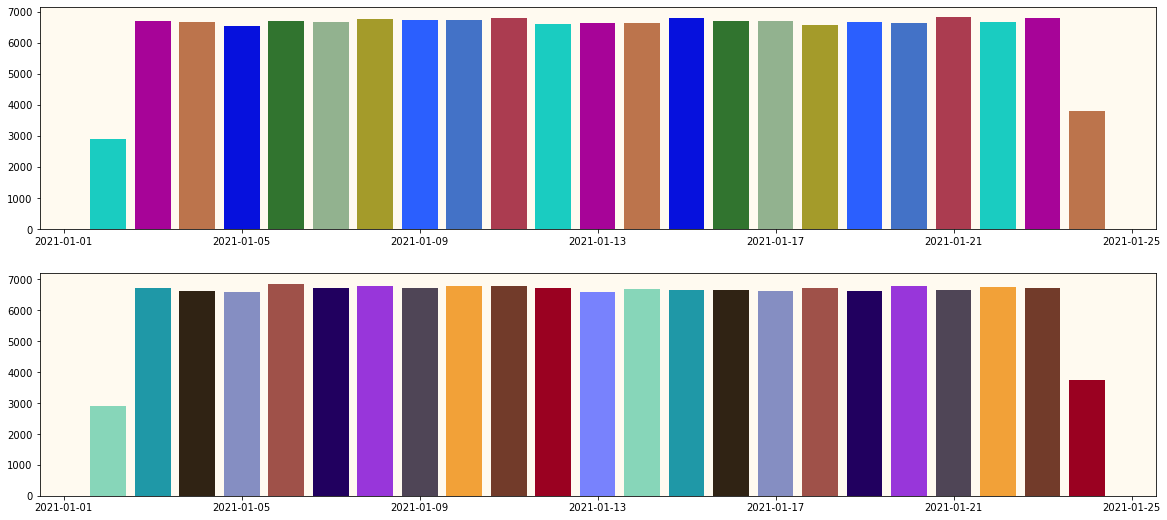

In [ ]:
# Через визуализацию проверяем совпадение временных отрезков в группе А и группе B.
x1 = df_a['date']
y1 = df_a['purchase']
x2 = df_b['date']
y2 = df_b['purchase']

fig, axes = plt.subplots(2, 1)

axes[0].set_facecolor('floralwhite')
axes[1].set_facecolor('floralwhite')
color_rectangle = np.random.rand(10, 3)    # RGB
axes[0].bar(x1, y1, color = color_rectangle)

color_rectangle = np.random.rand(12, 3)    # RGB
axes[1].bar(x2, y2, color = color_rectangle)

#fig.set_facecolor('floralwhite')
fig.set_figwidth(20)    #  ширина Figure
fig.set_figheight(9)    #  высота Figure


<blockquote><p>Временные отрезки в группах А и В совпадают.</p>

<span style="color:#8B0000">**1.3**</span>  Необходимо проверить распределения участников теста. Удовлетворяет ли разница в процентном выражении между группами условию, что разница не должна быть больше 1%?

In [ ]:
purchase_a = 147202
purchase_b = 147276
diff_a_b = round(((purchase_b-purchase_a)*100)/purchase_a, 4)
print(f'Разница между группами= {diff_a_b}%')


Разница между группами= 0.0503%


<blockquote>
<p>Разница между группами А и В менее 1%. Можно считать, что доли пользователей групп 50/50.</p>

<span style="color:#8B0000">**1.4 / 1.5**</span> Далее необходимо выполнить проверку, есть ли пользователи, которые в процессе A/B-теста попали в обе тестовые группы. Если да, то сколько таких уникальных пользователей? Найти пересечение групп.

In [ ]:
user_a = df.loc[df['group'] == 'A']['user_id'].nunique()
user_b = df.loc[df['group'] == 'B']['user_id'].nunique()

# метод set() — выдаст множество, исключив повторы, и позволит найти пересечение множеств
users_a=set(df[df['group']=='A']['user_id']) 
users_b=set(df[df['group']=='B']['user_id'])
users_ab=users_a.intersection(users_b)          # пересечение множеств

print(f'Количество пользователей сайта группы А= {user_a}')
print(f'Количество пользователей сайта группы B= {user_b}')
print(f'Количество пользователей, попавших в обе группы= {len(users_ab)}')

Количество пользователей сайта группы А= 146195
Количество пользователей сайта группы B= 146284
Количество пользователей, попавших в обе группы= 1895


<blockquote>
<p>1895 пользователей попали в обе группы.</p>

Необходимо удалить дубликаты из датафреймов по группам

In [ ]:
df_cor=df[~df['user_id'].isin(users_ab)] # Чтобы проверить, НЕ values находится ли он в DataFrame, используем оператор:~
user_a_df_cor = df_cor.loc[df['group'] == 'A']['user_id'].count()
user_b_df_cor = df_cor.loc[df['group'] == 'B']['user_id'].count()
print(f'Количество пользователей сайта группы А= {user_a_df_cor}')
print(f'Количество пользователей сайта группы B= {user_b_df_cor}')

Количество пользователей сайта группы А= 145307
Количество пользователей сайта группы B= 145381


In [ ]:
df_cor

,Unnamed: 0,user_id,date,group,purchase,price
0,0,851104,2021-01-21,A,0,0
1,1,804228,2021-01-12,A,0,0
2,2,661590,2021-01-11,B,0,0
3,3,853541,2021-01-08,B,0,0
4,4,864975,2021-01-21,A,1,150000
...,...,...,...,...,...,...
294473,294473,751197,2021-01-03,A,0,0
294474,294474,945152,2021-01-12,A,0,0
294475,294475,734608,2021-01-22,A,0,0
294476,294476,697314,2021-01-15,A,0,0


In [ ]:
# Необходимо проверить, разница в количестве сессий по прежнему отличается менее, чем на 1%.
purchase_a_cor = df_cor.loc[df_cor['group'] == 'A']['purchase'].count()
purchase_b_cor = df_cor.loc[df_cor['group'] == 'B']['purchase'].count()

print(f'Количество посещений сайта группой А= {purchase_a_cor}')
print(f'Количество посещений сайта группой B= {purchase_b_cor}')

diff_a_b_cor = round(((purchase_b_cor-purchase_a_cor)*100)/purchase_a_cor, 4)
print(f'Разница между группами= {diff_a_b}%')

Количество посещений сайта группой А= 145307
Количество посещений сайта группой B= 145381
Разница между группами= 0.0503%


<blockquote>
<p>Датафрейм очищен от дубликатов, выполнена проверка по корректности деления на группы - 50/50, параметр даты отформатирован, можно получать данные по группам А и В.</p>

<span style="color:#8B0000">**1.6**</span> Далее составим сводную таблицу, чтобы собрать показатели: количество пользователей, количество покупок, выручку, конверсию, средний чек.

In [ ]:
df_cor_piv = df_cor.groupby(['group']).agg({'user_id':'count','purchase':'sum', 'price':'sum'}).reset_index()
df_cor_piv.head()

,group,user_id,purchase,price
0,A,145307,17487,1417780000
1,B,145381,17290,1533010000


In [ ]:
# Добавим колонки конверсии и среднего чего.
df_cor_piv['conversion'] = round(df_cor_piv['purchase'] / df_cor_piv['user_id'], 4)
df_cor_piv['ARPU'] = round(df_cor_piv['price'] / df_cor_piv['purchase'], 2)

df_cor_piv.head()

,group,user_id,purchase,price,conversion,ARPU
0,A,145307,17487,1417780000,0.1203,81076.23
1,B,145381,17290,1533010000,0.1189,88664.55


<blockquote>
<p>Несмотря на то что в группе B было больше посетителей, (относительная) конверсия в группе B меньше. За счёт меньшей конверсии в группе B было меньше покупок, однако выручка группы B больше выручки группы A на 115230000 единиц. Большая выручка в группе B складывается за счёт того, что средний чек группы B выше среднего чека группы A.</p>

<span style="color:#8B0000">**1.7**</span> Исследуем, как распределяются суммы покупок. <br>Для этого оставим в таблице строки только строки с активным целевым действием клиента, разделим таблицу на две и визуализируем данные по группам.

In [ ]:
# Уберём из таблицы строки с нулевым показателем целевого действия клиента.
df_cor1 = df_cor.loc[df_cor['purchase'] != 0]
df_cor1

,Unnamed: 0,user_id,date,group,purchase,price
4,4,864975,2021-01-21,A,1,150000
6,6,679687,2021-01-19,B,1,10000
8,8,817355,2021-01-04,B,1,60000
9,9,839785,2021-01-15,B,1,10000
15,15,644214,2021-01-22,A,1,100000
...,...,...,...,...,...,...
294396,294396,838593,2021-01-15,B,1,150000
294405,294405,712217,2021-01-11,A,1,60000
294420,294420,795742,2021-01-09,A,1,60000
294430,294430,733871,2021-01-21,B,1,100000


In [ ]:
# Для визуализации разделим таблицу на две: группа А и группа В.
df_cor_a = df_cor1[df_cor1['group'] == 'A']
df_cor_b = df_cor1[df_cor1['group'] == 'B']

In [ ]:
# Cгруппируем для визуализации показателей по группам.
df_cor_a_piv = df_cor_a.groupby(['price']).agg({'purchase':'count'}).reset_index()
df_cor_b_piv = df_cor_b.groupby(['price']).agg({'purchase':'count'}).reset_index()


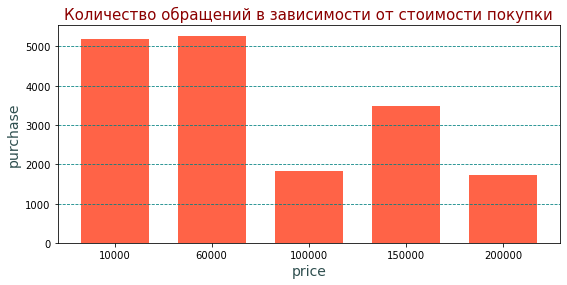

In [ ]:
# Строим столбчатую диаграмму для группы А
fig = plt.figure(figsize = (9,4))

plt.bar(df_cor_a_piv.price.astype(str), 
        df_cor_a_piv.purchase, 
        color= '#FF6347',
        width = 0.7)

plt.xlabel('price', color='#2F4F4F', size = 14)
plt.ylabel('purchase', color='#2F4F4F', size = 14)
plt.title(
    'Количество обращений в зависимости от стоимости покупки', color='#8B0000', size = 15
)

plt.grid(axis='y', color = '#008080', linestyle='dashed')
plt.show()

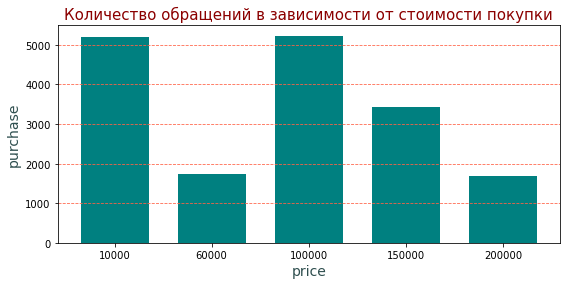

In [ ]:
# Строим столбчатую диаграмму для группы B.
fig = plt.figure(figsize = (9,4))

plt.bar(df_cor_b_piv.price.astype(str), 
        df_cor_b_piv.purchase, 
        color= '#008080',
        width = 0.7)

plt.xlabel('price', color='#2F4F4F', size = 14)
plt.ylabel('purchase', color='#2F4F4F', size = 14)
plt.title(
    'Количество обращений в зависимости от стоимости покупки', color='#8B0000', size = 15
)

plt.grid(axis='y', color = '#FF6347', linestyle='dashed')
plt.show()

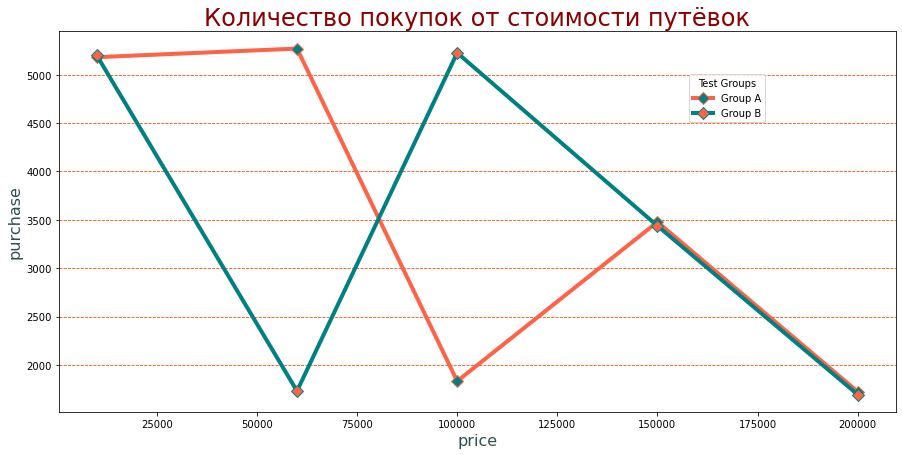

In [ ]:
# Визуализация по двум сводным таблицам, визуализация зависимости количества покупок от стоимости путёвки групп А и В.
plt.figure(figsize=(15,7))
plt.plot(df_cor_a_piv['price'], df_cor_a_piv['purchase'], color='#FF6347', ms=9, marker='D', markerfacecolor='#008080', linewidth=4, label='Group A')
plt.plot(df_cor_b_piv['price'], df_cor_b_piv['purchase'], color='#008080', ms=9, marker='D', markerfacecolor='#FF6347', linewidth=4, label='Group B')
plt.title('Количество покупок от стоимости путёвок', color='#8B0000', size = 24)
#plt.grid(axis='x', color = 'grey', linestyle='dashed')
plt.grid(axis='y', color = '#FF4500', linestyle='dashed')
plt.xlabel('price', color='#2F4F4F', size = 16)
plt.ylabel('purchase', color='#2F4F4F', size = 16)
plt.legend(title ="Test Groups",
    bbox_to_anchor = (0.6, 0.4, 0.25, 0.5),
    loc = 'best')
#plt.grid(True) # Разметка сетки
plt.show()

<span style="color:red">**В Ы В О Д**<span> <span style="color:#000000">(промежуточный)<span>
<blockquote>
<p>Участники группы A чаще покупают туры за 60000 рублей, при этом реже покупают туры за 100000 рублей. Участники группы В наоборот. В остальном покупательская способность обеих групп похожа.</p>

<span style="color:#006400">**ЗАДАЧA 2.**</span>
Рассчёт кумулятивных метрик.<br>
В рамках этой задачи:<br>
<span style="color:#006400">**2.1**</span> построить график конверсии в группах по дням;<br>
<span style="color:#006400">**2.2**</span> построить график среднего чека в группах по дням;<br>
<span style="color:#006400">**2.3**</span> построить график кумулятивных метрик по конверсии и по среднему чеку;<br>
<span style="color:#006400">**2.4**</span> сделать выводы.<br>

Ранее мы получили таблицу очищенную от дубликатов по группам: **df_cor**.<br>
Эту таблицу возьмём в работу для дальнейшего анализа.

<span style="color:#006400">**2.1**</span> Строим график конверсии в группах по дням. 

В таблице отображены входы клиента на сайт («сессии») и его действия. Чтобы посчитать конверсию по каждому дню, необходимо сделать таблицу, сгруппированную по дате и группе, и посчитать количество пользователей, заходивших на сайт, и количество целевых действий:

In [ ]:
# Строим сводную.
df_piv3 = df_cor.groupby(['date','group']).agg({'user_id':'count','purchase':'sum', 'price':'sum'}).reset_index()
df_piv3.head()

,date,group,user_id,purchase,price
0,2021-01-02,A,2854,359,29410000
1,2021-01-02,B,2861,345,29660000
2,2021-01-03,A,6596,748,62000000
3,2021-01-03,B,6619,754,65960000
4,2021-01-04,A,6566,799,64250000


In [ ]:
# Добавляем колонку с конверсией.
df_piv3['conversion'] = df_piv3['purchase'] / df_piv3['user_id']
df_piv3['ARPU'] = df_piv3['price'] / df_piv3['purchase']
df_piv3.head()

,date,group,user_id,purchase,price,conversion,ARPU
0,2021-01-02,A,2854,359,29410000,0.125788,81922.005571
1,2021-01-02,B,2861,345,29660000,0.120587,85971.014493
2,2021-01-03,A,6596,748,62000000,0.113402,82887.700535
3,2021-01-03,B,6619,754,65960000,0.113914,87480.106101
4,2021-01-04,A,6566,799,64250000,0.121687,80413.016270


In [ ]:
# Для облегчения восприятия кода создадим два отдельных датафрейма из полученной выше таблицы.
dfa_daily = df_piv3[df_piv3['group'] == 'A']
dfa_daily.head()

,date,group,user_id,purchase,price,conversion,ARPU
0,2021-01-02,A,2854,359,29410000,0.125788,81922.005571
2,2021-01-03,A,6596,748,62000000,0.113402,82887.700535
4,2021-01-04,A,6566,799,64250000,0.121687,80413.016270
6,2021-01-05,A,6433,790,64550000,0.122804,81708.860759
8,2021-01-06,A,6606,764,63410000,0.115652,82997.382199


In [ ]:
dfb_daily = df_piv3[df_piv3['group'] == 'B']
dfb_daily.head()

,date,group,user_id,purchase,price,conversion,ARPU
1,2021-01-02,B,2861,345,29660000,0.120587,85971.014493
3,2021-01-03,B,6619,754,65960000,0.113914,87480.106101
5,2021-01-04,B,6536,764,68030000,0.116891,89044.502618
7,2021-01-05,B,6511,749,63550000,0.115036,84846.461949
9,2021-01-06,B,6751,838,75020000,0.124130,89522.673031


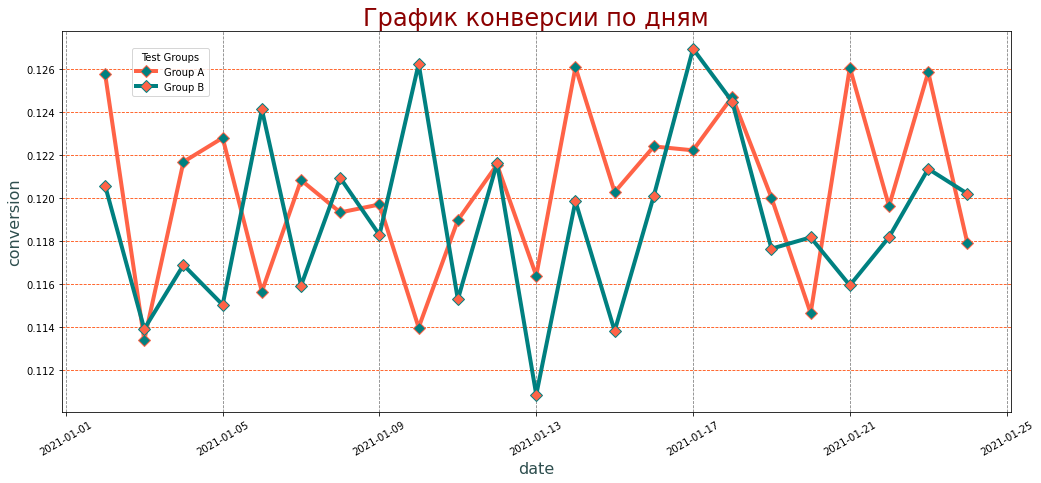

In [ ]:
plt.figure(figsize=(17,7))
plt.plot(dfa_daily['date'], dfa_daily['conversion'], color='#FF6347', ms=9, marker='D', markerfacecolor='#008080', linewidth=4, label='Group A')
plt.plot(dfb_daily['date'], dfb_daily['conversion'], color='#008080', ms=9, marker='D', markerfacecolor='#FF6347', linewidth=4, label='Group B')
plt.title('График конверсии по дням', color='#8B0000', size = 24)
plt.grid(axis='x', color = 'grey', linestyle='dashed')
plt.grid(axis='y', color = '#FF4500', linestyle='dashed')
plt.xticks(rotation = 30)
plt.xlabel('date', color='#2F4F4F', size = 16)
plt.ylabel('conversion', color='#2F4F4F', size = 16)
plt.legend(title ="Test Groups",
    bbox_to_anchor = (-0.09, 0.4, 0.25, 0.57),
    loc = 'best')
#plt.grid(True) # Разметка сетки
plt.show()

<blockquote>
<p>Конверсия у обеих групп «скачет» день ото дня. Понять, какая из групп лучше, затруднительно.</p>

Именно поэтому необходимо построить график кумулятивной конверсии, где за каждый день отображаются данные накопленным итогом.

Напишем функцию, которая для каждой уникальной даты в столбце **date** отфильтрует строки таблицы, где значения даты меньше или равны этой уникальной дате, и посчитает сумму значений в столбцах **user_id**, **purchase** и **price**.

In [ ]:
def cummulative_table(data): # В переменную data будем передавать название переменной датафейма
    df_cumm = [] # Создаём пустой список
    for i in data['date'].values: # Запускаем цикл по каждому отдельному значению даты
        out = data[data['date'] <= i].groupby('group')\
               .agg({'date':'max', 'user_id':'sum', 'purchase':'sum', 'price':'sum'})
        df_cumm.append(out) # Полученный срез добавляем в созданный ранее список
    return pd.concat(df_cumm).reset_index() # Объединяем списки и возвращаем результат

Далее разделим таблицу на два датафрейма по группам А и В, добавим кумулятивные значения по **conversion** и **ARPU**.

In [ ]:
cumm_a = cummulative_table(dfa_daily)
cumm_b = cummulative_table(dfb_daily)

In [ ]:
cumm_a['conversion'] = cumm_a['purchase'] / cumm_a['user_id']
cumm_b['conversion'] = cumm_b['purchase'] / cumm_b['user_id']
cumm_a['ARPU'] = cumm_a['price'] / cumm_a['purchase']
cumm_b['ARPU'] = cumm_b['price'] / cumm_b['purchase']

In [ ]:
cumm_a.head()

,group,date,user_id,purchase,price,conversion,ARPU
0,A,2021-01-02,2854,359,29410000,0.125788,81922.005571
1,A,2021-01-03,9450,1107,91410000,0.117143,82574.525745
2,A,2021-01-04,16016,1906,155660000,0.119006,81668.415530
3,A,2021-01-05,22449,2696,220210000,0.120094,81680.267062
4,A,2021-01-06,29055,3460,283620000,0.119084,81971.098266


In [ ]:
cumm_b.head()

,group,date,user_id,purchase,price,conversion,ARPU
0,B,2021-01-02,2861,345,29660000,0.120587,85971.014493
1,B,2021-01-03,9480,1099,95620000,0.115928,87006.369427
2,B,2021-01-04,16016,1863,163650000,0.116321,87842.190016
3,B,2021-01-05,22527,2612,227200000,0.115950,86983.154671
4,B,2021-01-06,29278,3450,302220000,0.117836,87600.000000


Выведем некоторые показатели.

In [ ]:
cumm_a[cumm_a['date'] == '2021-01-15']['price']

13    865120000
Name: price, dtype: int64

In [ ]:
cumm_b[cumm_b['date'] == '2021-01-20']['conversion']

18    0.118959
Name: conversion, dtype: float64

In [ ]:
cumm_a[cumm_a['date'] == '2021-01-12']['ARPU']

10    81491.827275
Name: ARPU, dtype: float64

Визуализация наглядно покажет нам данные по кумулятивной конферсии из таблицы.

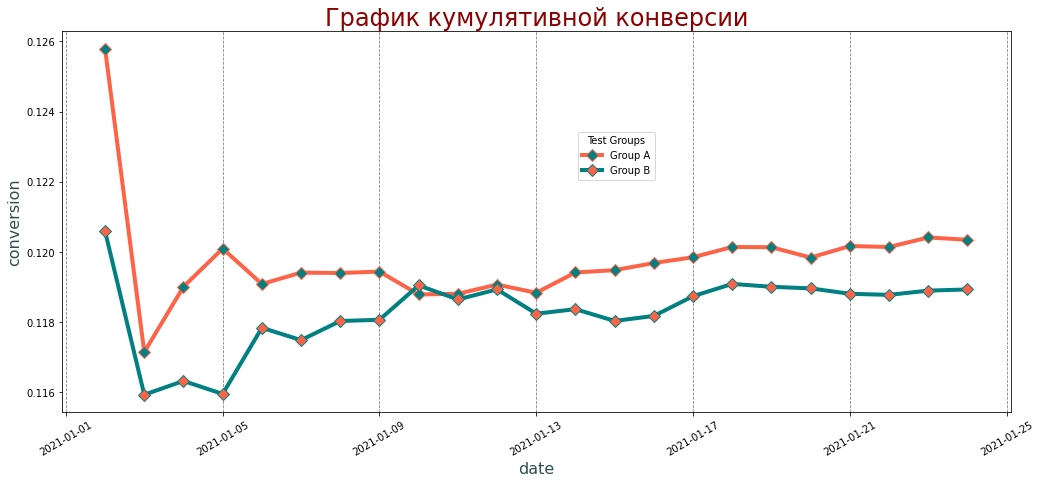

In [ ]:
plt.figure(figsize=(17,7))
plt.plot(cumm_a['date'], cumm_a['conversion'], color='#FF6347', ms=9, marker='D', markerfacecolor='#008080', linewidth=4, label='Group A')
plt.plot(cumm_b['date'], cumm_b['conversion'], color='#008080', ms=9, marker='D', markerfacecolor='#FF6347', linewidth=4, label='Group B')
plt.title('График кумулятивной конверсии', color='#8B0000', size = 24)
plt.grid(axis='x', color = 'grey', linestyle='dashed')
#plt.grid(axis='y', color = '#FF4500', linestyle='dashed')
plt.xticks(rotation = 30)
plt.xlabel('date', color='#2F4F4F', size = 16)
plt.ylabel('conversion', color='#2F4F4F', size = 16)
plt.legend(title ="Test Groups",
    bbox_to_anchor = (0.38, 0.4, 0.25, 0.35),
    loc = 'best')
#plt.grid(True) # Разметка сетки
plt.show()

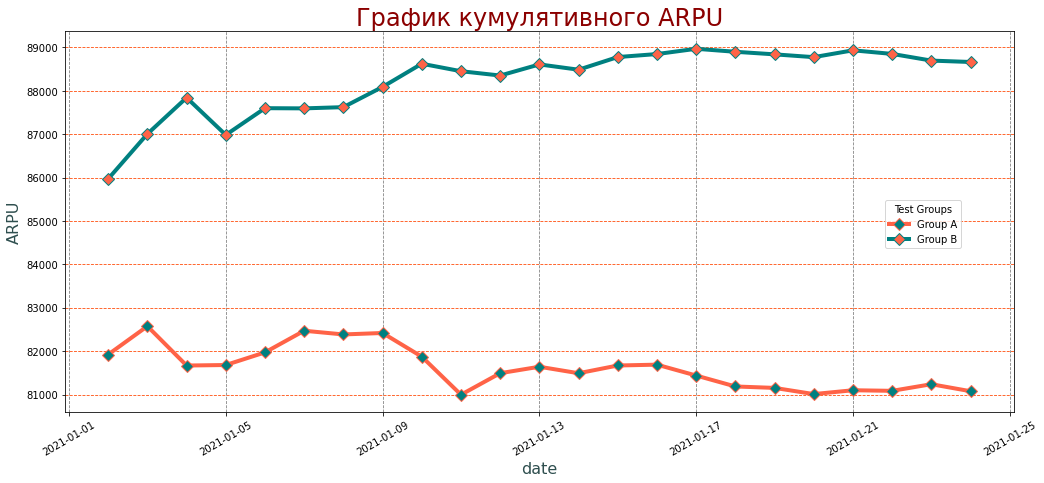

In [ ]:
plt.figure(figsize=(17,7))
plt.plot(cumm_a['date'], cumm_a['ARPU'], color='#FF6347', ms=9, marker='D', markerfacecolor='#008080', linewidth=4, label='Group A')
plt.plot(cumm_b['date'], cumm_b['ARPU'], color='#008080', ms=9, marker='D', markerfacecolor='#FF6347', linewidth=4, label='Group B')
plt.title('График кумулятивного ARPU', color='#8B0000', size = 24)
plt.grid(axis='x', color = 'grey', linestyle='dashed')
plt.grid(axis='y', color = '#FF4500', linestyle='dashed')
plt.xticks(rotation = 30)
plt.xlabel('date', color='#2F4F4F', size = 16)
plt.ylabel('ARPU', color='#2F4F4F', size = 16)
plt.legend(title ="Test Groups",
    bbox_to_anchor = (0.7, 0.4, 0.25, 0.17),
    loc = 'best')
#plt.grid(True) # Разметка сетки
plt.show()

<span style="color:red">**В Ы В О Д**<span> <span style="color:#000000">(промежуточный)<span>
<blockquote>
<p>Изначально конверсия группы B была ниже конверсии группы А, однако она показывала стабильный рост, и примерно 10 января конверсия группы B стала выше конверсии группы А. После чего конверсия группы B зафиксировалась примерно на этом уровне (с колебаниями). В то время как конверсия группы А начала постепенно расти. В результате конверсия группы А стабильно выше группы B. Но средний чек группы B выше среднего чека группы А.</p>

<span style="color:#000080">**ЗАДАЧA 3.**</span>
Проведение статистической проверки гипотез:.<br>
В рамках этой задачи:<br>
<span style="color:#000080">**3.1**</span> о равенстве конверсии;<br>
<span style="color:#000080">**3.2**</span> о равенстве выручки;<br>
<span style="color:#000080">**3.3**</span> о равенстве средних чеков по дням.<br>

Проверим характер распределения конверсии групп А и В.

<AxesSubplot:>

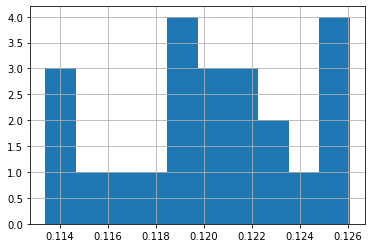

In [ ]:
dfa_daily[dfa_daily['group'] == 'A']['conversion'].hist()

<AxesSubplot:>

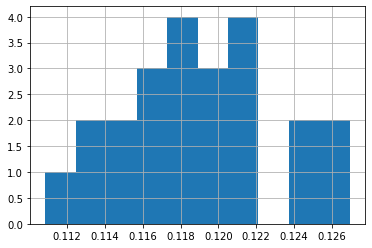

In [ ]:
dfb_daily[dfb_daily['group'] == 'B']['conversion'].hist()

<blockquote>
<p>Характер распределения конверсии по дням скорее нормальный.</p>

<span style="color:#000080">**4.1.**</span><br>
Выдвигаем нулевую гипотезу и альтернативную. Н(0): Конверсии обеих групп равны; Н(1): Конверсии групп не равны.<br>
Нулевая гипотеза всегда предполагает, что средние исследуемых генеральных совокупностей равны, то есть: <br>
H(0) : pi(1) = pi(2)<br>
H(1) : pi(1) != pi(2)<br>
В таком случае, если нулевая гипотеза верна, то выражение pi(1)-pi(2) будет равняться нулю, а критерий будет рассчитываться по известным нам выборочным данным.<br>
**Для проверки гипотезы о равенстве конверсии применим Z-тест.**

In [ ]:
a = .05 # критический уровень статистической значимости.

x1 = 17487 # Количество посещений сайта группой А
x2 = 17290 # Количество посещений сайта группой B

n1 = 145307 #Количество пользователей сайта группы А
n2 = 145381 # Количество пользователей сайта группы B

p1 = x1 / n1
p2 = x2 / n2

p = (x1 + x2) / (n1 + n2)
print(round(p, 4))

diff = p1 - p2
print(round(diff, 4))

0.1196
0.0014


In [ ]:
# Считаем Z-критическое.
sq = (p * (1 - p) * (1/n1 + 1/n2))
z = diff / mth.sqrt(p * (1 - p) * (1/n1 + 1/n2))

print(round(z, 4)) 


1.1765


In [ ]:
# Зададим нормальное стандартное распределение со средним, равным нулю, и стандартным отклонением, равным единице:
distr = st.norm(0, 1)

In [ ]:
p_val = (1 - distr.cdf(abs(z))) * 2
print(round(p_val, 4))

0.2394


In [ ]:
print(p_val > a)

True


<blockquote>
<p>P-value больше принятого уровня значимости, следовательно, статистически значимая разница между конверсиями отсутствует.</p>

<span style="color:#000080">**4.2**</span> Проверяем различия в стоимости заказов между группами.<br>
Выдвигаем нулевую гипотезу и альтернативную. Н(0): Стоимости заказов групп равны; Н(1): Стоимости заказов групп не равны.<br>
Нулевая гипотеза всегда предполагает, что средние исследуемых генеральных совокупностей равны, то есть: <br>
H(0) : pi(1) = pi(2)<br>
H(1) : pi(1) != pi(2)<br>
В таком случае, если нулевая гипотеза верна, то выражение pi(1)-pi(2) будет равняться нулю, а критерий будет рассчитываться по известным нам выборочным данным.


Проверим характер распределения стоимости заказов групп А и В.

<AxesSubplot:>

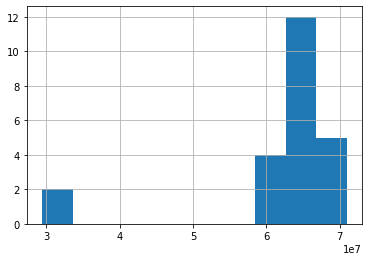

In [ ]:
dfa_daily[dfa_daily['group'] == 'A']['price'].hist()

<AxesSubplot:>

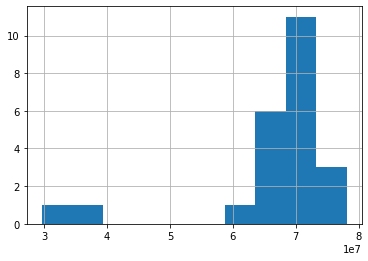

In [ ]:
dfb_daily[dfb_daily['group'] == 'B']['price'].hist()

<blockquote>
<p>Распределение стоимости заказов в группах далёк от нормального характера.</p>

**Для проверки гипотезы о равенстве конверсии применим Тест Манна-Уитни.**

In [ ]:
a1 = .05 # критический уровень статистической значимости.

results = st.mannwhitneyu(df_cor[(df_cor['group'] == 'A') & (df_cor['purchase'] == 1)]['price'].values, 
                       df_cor[(df_cor['group'] == 'B') & (df_cor['purchase'] == 1)]['price'].values)

print('p-value', results.pvalue)

p-value 2.825361345286736e-37


In [ ]:
print(results.pvalue > a1)

False


<blockquote>
<p>Отвергаем нулевую гипотезу: стоимости заказов не равны.</p>

<span style="color:#000080">**4.3**</span> Проверяем гипотезу о равенстве средних чеков по дням.<br>
Выдвигаем нулевую гипотезу и альтернативную. Н(0): Стоимости средних чеков по дням равны; Н(1): Стоимость средних чеков по дням не равны.<br>
Нулевая гипотеза всегда предполагает, что средние исследуемых генеральных совокупностей равны, то есть: <br>
H(0) : pi(1) = pi(2)<br>
H(1) : pi(1) != pi(2)<br>
В таком случае, если нулевая гипотеза верна, то выражение pi(1)-pi(2) будет равняться нулю, а критерий будет рассчитываться по известным нам выборочным данным.

Проверяем различие средних чеков по дням. 

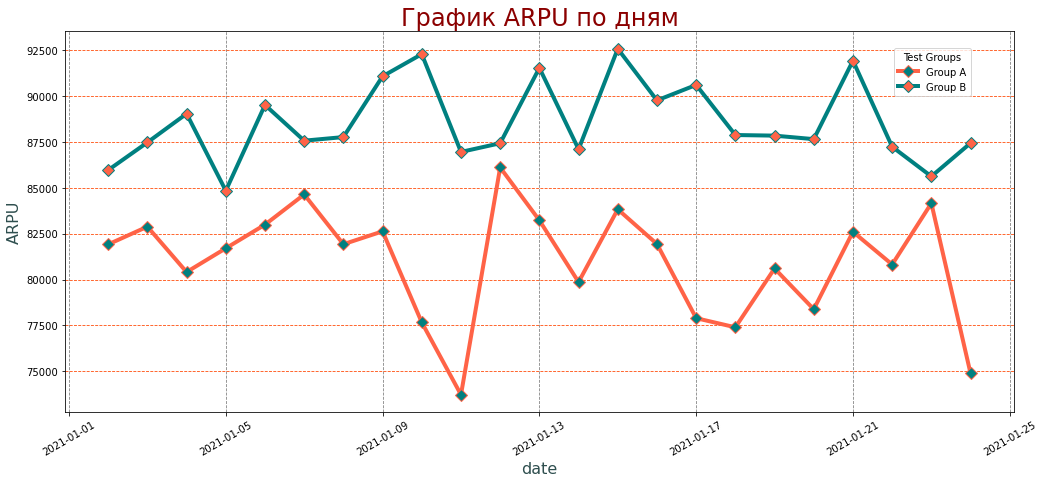

In [ ]:
# Визуализируем данные среднего чека по дням.
plt.figure(figsize=(17,7))
plt.plot(df_aа['date'], df_aа['ARPU'], color='#FF6347', ms=9, marker='D', markerfacecolor='#008080', linewidth=4, label='Group A')
plt.plot(df_bb['date'], df_bb['ARPU'], color='#008080', ms=9, marker='D', markerfacecolor='#FF6347', linewidth=4, label='Group B')
plt.title('График ARPU по дням', color='#8B0000', size = 24)
plt.grid(axis='x', color = 'grey', linestyle='dashed')
plt.grid(axis='y', color = '#FF4500', linestyle='dashed')
plt.xticks(rotation = 30)
plt.xlabel('date', color='#2F4F4F', size = 16)
plt.ylabel('ARPU', color='#2F4F4F', size = 16)
plt.legend(title ="Test Groups",
    bbox_to_anchor = (0.71, 0.4, 0.25, 0.57),
    loc = 'best')
#plt.grid(True) # Разметка сетки
plt.show()

Необходимо проверить характер распределения значений среднего чека по дням.

<AxesSubplot:>

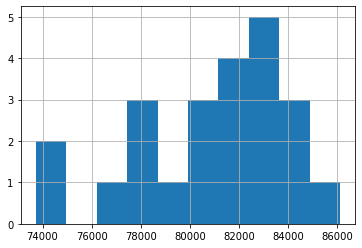

In [ ]:
dfa_daily[dfa_daily['group'] == 'A']['ARPU'].hist()

<AxesSubplot:>

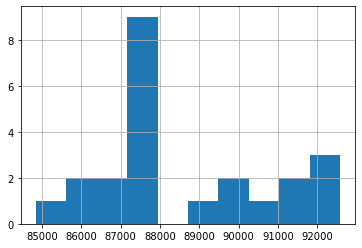

In [ ]:
dfb_daily[dfb_daily['group'] == 'B']['ARPU'].hist()

<blockquote>
<p>Распределение носит скорее нормальный характер.</p>

**Для проверки гипотезы о равенстве конверсии применим Т-тест.**

In [ ]:
a3 = .05
results = st.ttest_ind(dfa_daily[dfa_daily['group'] == 'A']['ARPU'].values, 
                       dfb_daily[dfb_daily['group'] == 'B']['ARPU'].values)

print('p-value', results.pvalue)

p-value 2.2523589349617907e-12


In [ ]:
print(results.pvalue > a3)

False


<blockquote>
<p>Отвергаем нулевую гипотезу. Между средними чеками есть разница.</p>

<div id="header" align="center"><h1><span style="color:red">В Ы В О Д Ы</span><br></h1></div>
<blockquote>
<p>Несмотря на то что конверсия группы B ниже, статистической значимости в конверсии не достигнуто, соответственно, считать конверсии разными оснований нет. Зато средний чек группы B значительно выше среднего чека группы A. Статистическая значимость достигнута. Вариант сайта B приносит значимо больше выручки, чем вариант сайта A. Рекомендуем признать, что вариант B лучше, чем вариант A!</p>